In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(color_codes=True)

In [107]:
url = "https://storage.googleapis.com/kaggle-datasets/1291/2355/Automobile_data.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1559467184&Signature=WKTRURoY9qlgJD5AX%2FqmFEfjYe06cp5fFDYBj5ACL55qF8X1vGXUdzxicz265wgdWivI2zGzBwLqimDYa96Gpl7vdaUN0o5ldsZr6N%2BatT4gyXcPGg3js9Z8W%2BBQgui83vx%2Fm8eIJgOPx5LenGxVh8DZ7eLZ%2FFuK3dUXf8cdkcdRrnj3Us2IqNf1enGflrNrlwG0cvU3jkFsqfhMbYelGy%2BgOuGjG41t76kyfxNty9XHV%2BbFjljmXwXFKlFTgSUcZRecnmAyZETRMBAiwGGARC4hKkJEa8ysGQQpPWgWKdwEtB%2Byjzq3tu59sHpVNqFJI1spfLSqCV%2B2em6s7e9hDg%3D%3D"
data = pd.read_csv(url)
data = data.replace('?', np.nan).fillna(method='bfill')
cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]
for col in cols:
    data[col] = pd.to_numeric(data[col])
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [108]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [110]:
data['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

### Univarient Plots

#### distplot
- can be used to plot any numerical columns in histograms and kernel density estimations
- cannot plot categorical variables with strings as values
- kde can be turned of using kde=False
- rug=True shows the distribution of each value in the bins, if the concentration of the data is higher in a certain bin then the lines will be more densly packed in the bin

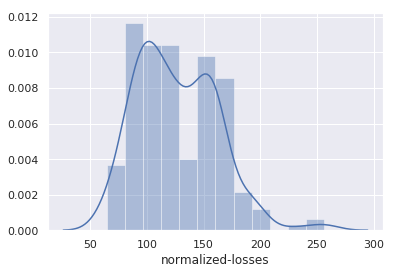

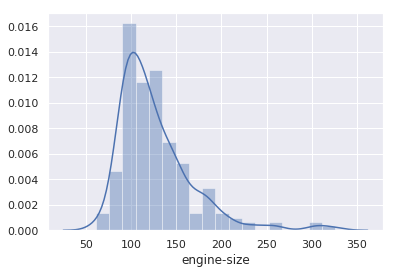

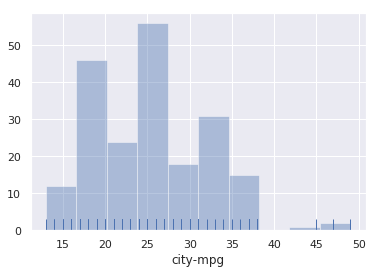

In [111]:
sns.distplot(data["normalized-losses"])
plt.show()
sns.distplot(data["engine-size"])
plt.show()
sns.distplot(data["city-mpg"], kde=False, rug=True)
plt.show()

### MultiVarient Plot

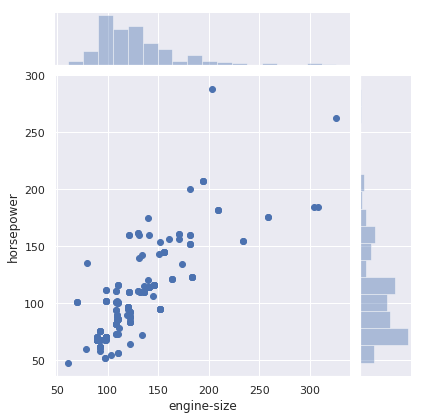

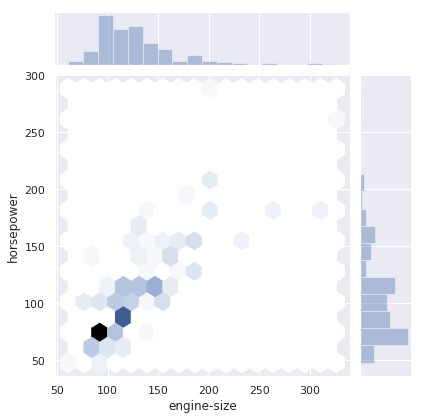

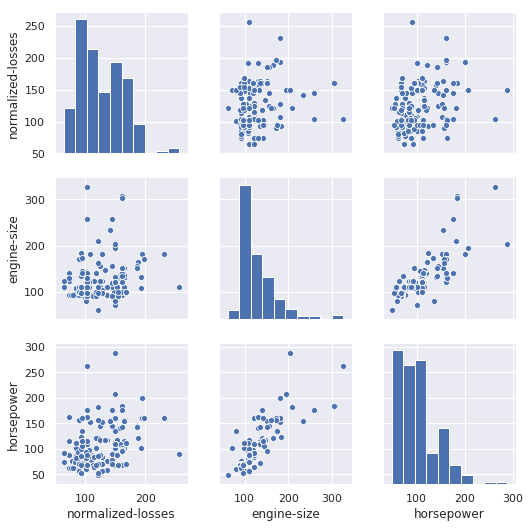

In [112]:
sns.jointplot(data["engine-size"],
              data["horsepower"])
plt.show()

sns.jointplot(data["engine-size"],
              data["horsepower"],
              kind='hex')
plt.show()

sns.pairplot(data[
    ["normalized-losses",
     "engine-size",
     "horsepower"]
                 ])
plt.show()

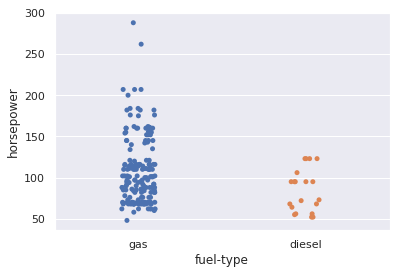

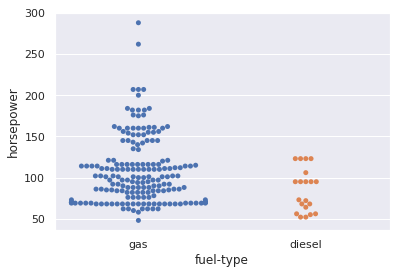

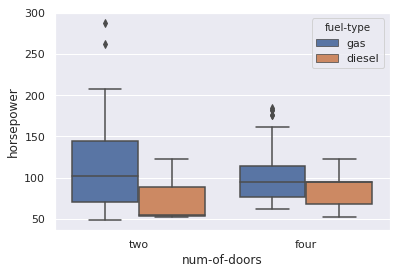

In [113]:
sns.stripplot(data["fuel-type"], data["horsepower"])
plt.show()

sns.swarmplot(data["fuel-type"], data["horsepower"])
plt.show()

sns.boxplot(data["num-of-doors"], data["horsepower"], hue=data["fuel-type"])
plt.show()

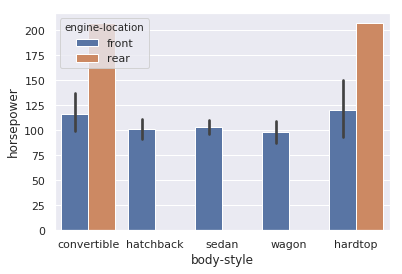

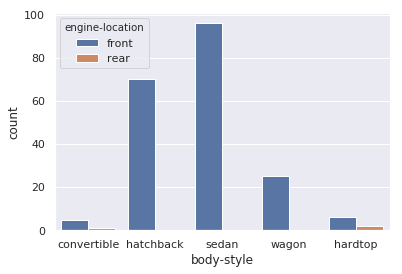

In [114]:
sns.barplot(data["body-style"], data["horsepower"], hue=data["engine-location"])
plt.show()

sns.countplot(data["body-style"], hue=data["engine-location"])
plt.show()

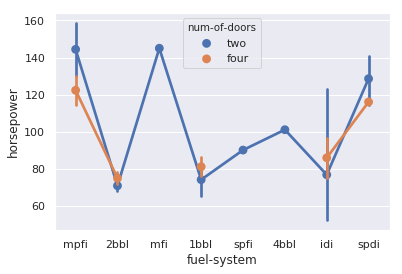

In [115]:
sns.pointplot(data["fuel-system"], data["horsepower"], hue=data["num-of-doors"] )
plt.show()

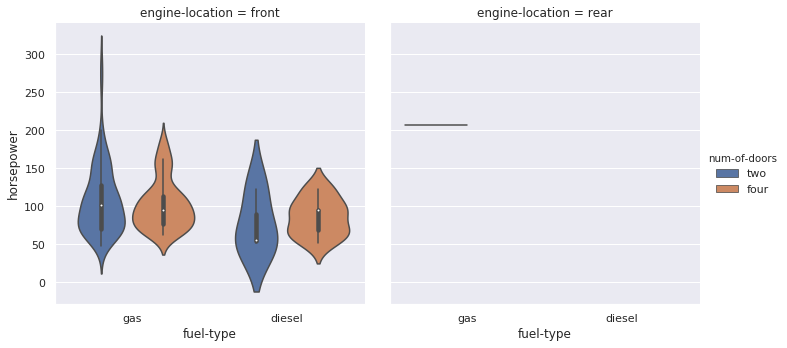

In [119]:
sns.catplot(x='fuel-type',
               y='horsepower',
               hue='num-of-doors',
               col='engine-location',
               data=data,
               kind='violin')
plt.show()
# kind = {"point", "bar", "strip", "swarm", "box", "violin", or "boxen"}

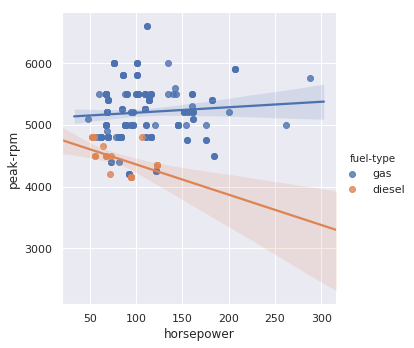

In [122]:
sns.lmplot(x='horsepower', y='peak-rpm', data=data, hue='fuel-type')
plt.show()